In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 

from sklearn.preprocessing import normalize 


In [78]:
emails_dfs=pd.read_csv('./emails.csv')
emails_df=emails_dfs.head(700)



In [79]:
emails_df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...
7,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...
8,allen-p/_sent_mail/101.,Message-ID: <20641191.1075855687472.JavaMail.e...
9,allen-p/_sent_mail/102.,Message-ID: <30795301.1075855687494.JavaMail.e...


In [4]:
emails_df.message[1]

"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what 

In [80]:
def parse_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['date','x-from', 'x-to','subject']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [81]:
def parse_into_emails(messages):
    emails = [parse_message(message) for message in messages]
    return {
        'date':[email['date'] for email in emails],
        'sender' : [email['x-from'] for email in emails],
        'receiver': [email['x-to'] for email in emails], 
        'subject':[email['subject'] for email in emails],
        'body': [email['body'] for email in emails]
        
        
    }


In [7]:
emails = [parse_message(message) for message in emails_df.message]
for email in emails:
    print (email)

   
    
    

{'date': 'Mon, 14 May 2001 16', 'subject': '', 'x-from': 'Phillip K Allen', 'x-to': 'Tim Belden <Tim Belden/Enron@EnronXGate>', 'body': 'Here is our forecast'}
{'date': 'Fri, 4 May 2001 13', 'subject': 'Re', 'x-from': 'Phillip K Allen', 'x-to': 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>', 'body': "Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.My suggestion for where to go is

In [82]:
email_df = pd.DataFrame(parse_into_emails(emails_df.message))

In [83]:
email_df

,date,sender,receiver,subject,body
0,"Mon, 14 May 2001 16",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,Here is our forecast
1,"Fri, 4 May 2001 13",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Re,Traveling to have a business meeting takes the...
2,"Wed, 18 Oct 2000 03",Phillip K Allen,Leah Van Arsdall,Re,test successful. way to go!!!
3,"Mon, 23 Oct 2000 06",Phillip K Allen,Randall L Gay,,"Randy,Can you send me a schedule of the salary..."
4,"Thu, 31 Aug 2000 05",Phillip K Allen,Greg Piper,Re,
5,"Thu, 31 Aug 2000 04",Phillip K Allen,Greg Piper,Re,"Greg,How about either next Tuesday or Thursday..."
6,"Tue, 22 Aug 2000 07",Phillip K Allen,"david.l.johnson@enron.com, John Shafer",,Phillip Allen (pallen@enron.com)Mike Grigsby (...
7,"Fri, 14 Jul 2000 06",Phillip K Allen,Joyce Teixeira,Re,
8,"Tue, 17 Oct 2000 02",Phillip K Allen,Mark Scott,Re,I don't think these are required by the ISP2. ...
9,"Mon, 16 Oct 2000 06",Phillip K Allen,zimam@enron.com,FW,---------------------- Forwarded by Phillip K ...


In [84]:
email_df.isna().sum()

date        0
sender      0
receiver    0
subject     0
body        0
dtype: int64

In [85]:
# Drop emails with empty body, to or from_ columns. 
email_df.drop(email_df.query("body == ''").index, inplace=True)

In [86]:
#LDA 
data_text = email_df[['body']]
data_text['index'] = data_text.index
documents = data_text

C:\Users\Manel\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append((token))
    return result

In [88]:
processed_docs = documents['body'].map(preprocess)
processed_docs

0                                             [forecast]
1      [traveling, business, meeting, takes, trip, es...
2                                     [test, successful]
3      [randy, send, schedule, salary, level, thesche...
5                     [greg, tuesday, thursday, phillip]
6      [phillip, allen, pallen, enron, mike, grigsby,...
8                     [think, required, static, address]
9      [forwarded, phillip, allen, phillip, discussed...
10     [buckner, delivered, diego, enron, energy, ser...
11     [lucy, open, save, rentroll, folder, follow, s...
12     [forwarded, phillip, allen, richard, issues, l...
13     [forwarded, phillip, allen, richard, issues, l...
14     [dave, names, west, desk, members, category, o...
15                         [paula, million, finephillip]
16     [forwarded, phillip, allen, enron, north, amer...
17     [mike, grigsby, having, problems, accessing, w...
18     [forwarded, phillip, allen, respond, cbpres, a...
19     [forwarded, phillip, all

In [89]:
dictionary = gensim.corpora.Dictionary(processed_docs)


In [90]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 forecast
1 austin
2 better
3 boat
4 business
5 desired
6 different
7 discussion
8 discussions
9 especially
10 flying


In [91]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [92]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [93]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [94]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.412*"enron" + 0.084*"corp" + 0.021*"allen" + 0.018*"mail" + 0.013*"john" + 0.012*"forwarded" + 0.009*"mike" + 0.008*"access" + 0.007*"scott" + 0.007*"mark"
Topic: 1 
Words: 0.044*"loan" + 0.035*"land" + 0.032*"allen" + 0.028*"cost" + 0.026*"costs" + 0.026*"construction" + 0.019*"cash" + 0.019*"value" + 0.016*"forwarded" + 0.015*"equity"
Topic: 2 
Words: 0.039*"know" + 0.038*"allen" + 0.030*"forwarded" + 0.026*"thanks" + 0.019*"power" + 0.015*"need" + 0.014*"mail" + 0.014*"think" + 0.013*"socal" + 0.012*"rent"
Topic: 3 
Words: 0.028*"like" + 0.027*"need" + 0.021*"thank" + 0.019*"email" + 0.018*"jeff" + 0.018*"year" + 0.017*"time" + 0.015*"cash" + 0.015*"west" + 0.013*"rentroll"
Topic: 4 
Words: 0.047*"position" + 0.026*"work" + 0.025*"need" + 0.020*"going" + 0.019*"deal" + 0.019*"allen" + 0.018*"manager" + 0.016*"physical" + 0.014*"week" + 0.014*"good"
Topic: 5 
Words: 0.031*"time" + 0.025*"socal" + 0.022*"allen" + 0.020*"daily" + 0.018*"market" + 0.016*"information" 

In [95]:
#Kmeans
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(email_df.body)

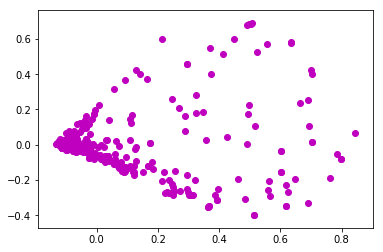

In [96]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [97]:
#top key words in the email exemple email 1
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df


In [98]:
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)
features = vect.get_feature_names()
print (top_feats_in_doc(X, features, 1, 10))

    features     score
0   meetings  0.415133
1       trip  0.345624
2   business  0.338875
3        ski  0.250274
4      takes  0.223328
5        try  0.144147
6  stimulate  0.125137
7       golf  0.125137
8     speaks  0.125137
9        fun  0.125137


In [99]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)


In [100]:
c = clf.cluster_centers_

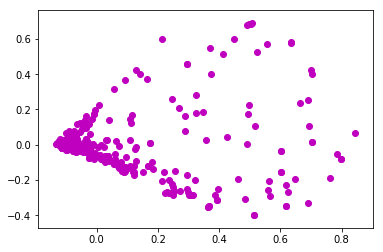

In [101]:
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

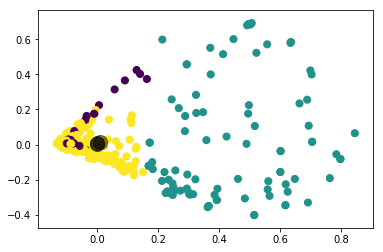

In [102]:
plt.scatter(coords[:, 0], coords[:, 1], c=labels, s=50, cmap='viridis')

centers = clf.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);